BRITISH AIRWAYS ANALYSIS
---


In [1]:
#import packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format 
np.set_printoptions(suppress=True, precision=5)

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []
rating =[]
date =[]
country = []

for i in range(1, pages+1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    # Scapping page xong phải biết scrap bao nhiêu page 
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content1 = response.content
    contents = BeautifulSoup(content1, 'html.parser')
    for item in contents.find_all("div", {"class": "text_content"}):
        reviews.append(item.get_text())
        #(try:
        #   rating.append(item.span.text)
        #except:
            #print(f'Error on page {i}')
            #rating.append("None")
    
    for item in contents.find_all('div', class_ = 'rating-10'):
            rating.append(item.span.text)

    for item in contents.find_all('time'):
        date.append(item.text)
    
    for item in contents.find_all('h3'):
        country.append(item.span.next_sibling.text.strip(" ()"))

    print(f"   ---> {len(reviews)} +{len(rating)} + {len(date)} + {len(country)} total")

Scraping page 1
   ---> 100 +101 + 100 + 100 total
Scraping page 2
   ---> 200 +202 + 200 + 200 total
Scraping page 3
   ---> 300 +303 + 300 + 300 total
Scraping page 4
   ---> 400 +404 + 400 + 400 total
Scraping page 5
   ---> 500 +505 + 500 + 500 total
Scraping page 6
   ---> 600 +606 + 600 + 600 total
Scraping page 7
   ---> 700 +707 + 700 + 700 total
Scraping page 8
   ---> 800 +808 + 800 + 800 total
Scraping page 9
   ---> 900 +909 + 900 + 900 total
Scraping page 10
   ---> 1000 +1010 + 1000 + 1000 total
Scraping page 11
   ---> 1100 +1111 + 1100 + 1100 total
Scraping page 12
   ---> 1200 +1212 + 1200 + 1200 total
Scraping page 13
   ---> 1300 +1313 + 1300 + 1300 total
Scraping page 14
   ---> 1400 +1414 + 1400 + 1400 total
Scraping page 15
   ---> 1500 +1515 + 1500 + 1500 total
Scraping page 16
   ---> 1600 +1616 + 1600 + 1600 total
Scraping page 17
   ---> 1700 +1717 + 1700 + 1700 total
Scraping page 18
   ---> 1800 +1818 + 1800 + 1800 total
Scraping page 19
   ---> 1900 +1919 +

In [3]:
# Rating diff by on top overall +1 each page

len(rating), len(reviews), len(date), len(country)

(2020, 2000, 2000, 2000)

In [4]:
# Rating removing
new_rating = [] 
for i in range(len(rating)-1):
    i+=1
    if rating[i] == '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5':
        continue
    else:
        new_rating.append(rating[i])
len(new_rating)            

2000

In [5]:
#Tạo bảng cho dataframe mới
df = pd.DataFrame({"reviews":reviews,"ratings": new_rating, "date":date, "country": country})
df.head()

,reviews,ratings,date,country
0,✅ Trip Verified | The incoming and outgoing f...,1,10th March 2023,United Kingdom
1,✅ Trip Verified | Back in December my family ...,1,10th March 2023,Australia
2,✅ Trip Verified | As usual the flight is dela...,1,10th March 2023,United Kingdom
3,✅ Trip Verified | A short BA euro trip and thi...,8,9th March 2023,United Kingdom
4,Not Verified | We are flying Business class f...,1,8th March 2023,United States


In [6]:
#df.to_csv("E:/learn st new/BA_reviews2.csv")

## Clean dữ liệu
---

In [7]:
review2 = []
x = '|'
for i in range(0, 2000):
    if x in reviews[i]:
        review2.append(reviews[i])
    else:
        review2.append(str(x +' '+ reviews[i]))
len(review2)    

2000

In [8]:
df2 = pd.DataFrame({"reviews":review2,"ratings": new_rating, "date":date, "country": country})
df2.head()

,reviews,ratings,date,country
0,✅ Trip Verified | The incoming and outgoing f...,1,10th March 2023,United Kingdom
1,✅ Trip Verified | Back in December my family ...,1,10th March 2023,Australia
2,✅ Trip Verified | As usual the flight is dela...,1,10th March 2023,United Kingdom
3,✅ Trip Verified | A short BA euro trip and thi...,8,9th March 2023,United Kingdom
4,Not Verified | We are flying Business class f...,1,8th March 2023,United States


In [9]:
review_clean = df2.reviews.str.split('|', expand=True)[1]
df2['clean_review'] = review_clean

In [10]:
df2['verified'] = df2.reviews.str.contains("Trip Verified")

In [11]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2['clean_review'].apply(clean)

In [12]:
df2.date= pd.to_datetime(df2.date)
df2.head()

,reviews,ratings,date,country,clean_review,verified,Cleaned Reviews
0,✅ Trip Verified | The incoming and outgoing f...,1,2023-03-10,United Kingdom,The incoming and outgoing flight was delayed...,True,The incoming and outgoing flight was delayed ...
1,✅ Trip Verified | Back in December my family ...,1,2023-03-10,Australia,Back in December my family and I as we were ...,True,Back in December my family and I as we were g...
2,✅ Trip Verified | As usual the flight is dela...,1,2023-03-10,United Kingdom,"As usual the flight is delayed this week, it...",True,As usual the flight is delayed this week it a...
3,✅ Trip Verified | A short BA euro trip and thi...,8,2023-03-09,United Kingdom,A short BA euro trip and this is where BA exc...,True,A short BA euro trip and this is where BA exc...
4,Not Verified | We are flying Business class f...,1,2023-03-08,United States,We are flying Business class for most of our...,False,We are flying Business class for most of our ...


## Tokenize Dữ liệu và Enrichment – POS tagging
---
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [14]:
##This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences
nltk.download('punkt')

#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\OS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\OS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df2['POS tagged'] = df2['Cleaned Reviews'].apply(token_stop_pos)
df2.head()

,reviews,ratings,date,country,clean_review,verified,Cleaned Reviews,POS tagged
0,✅ Trip Verified | The incoming and outgoing f...,1,2023-03-10,United Kingdom,The incoming and outgoing flight was delayed...,True,The incoming and outgoing flight was delayed ...,"[(incoming, n), (outgoing, v), (flight, n), (d..."
1,✅ Trip Verified | Back in December my family ...,1,2023-03-10,Australia,Back in December my family and I as we were ...,True,Back in December my family and I as we were g...,"[(Back, r), (December, n), (family, n), (getti..."
2,✅ Trip Verified | As usual the flight is dela...,1,2023-03-10,United Kingdom,"As usual the flight is delayed this week, it...",True,As usual the flight is delayed this week it a...,"[(usual, a), (flight, n), (delayed, v), (week,..."
3,✅ Trip Verified | A short BA euro trip and thi...,8,2023-03-09,United Kingdom,A short BA euro trip and this is where BA exc...,True,A short BA euro trip and this is where BA exc...,"[(short, a), (BA, n), (euro, n), (trip, n), (B..."
4,Not Verified | We are flying Business class f...,1,2023-03-08,United States,We are flying Business class for most of our...,False,We are flying Business class for most of our ...,"[(flying, v), (Business, n), (class, n), (flig..."


## Stopwords removal + Obtaining the stem words
--- 
* Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

* A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [16]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS tagged'].apply(lemmatize)
df2.head()

,reviews,ratings,date,country,clean_review,verified,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | The incoming and outgoing f...,1,2023-03-10,United Kingdom,The incoming and outgoing flight was delayed...,True,The incoming and outgoing flight was delayed ...,"[(incoming, n), (outgoing, v), (flight, n), (d...",incoming outgo flight delay French Air Traff...
1,✅ Trip Verified | Back in December my family ...,1,2023-03-10,Australia,Back in December my family and I as we were ...,True,Back in December my family and I as we were g...,"[(Back, r), (December, n), (family, n), (getti...",Back December family get onto plane refuse E...
2,✅ Trip Verified | As usual the flight is dela...,1,2023-03-10,United Kingdom,"As usual the flight is delayed this week, it...",True,As usual the flight is delayed this week it a...,"[(usual, a), (flight, n), (delayed, v), (week,...",usual flight delay week already hour hold bu...
3,✅ Trip Verified | A short BA euro trip and thi...,8,2023-03-09,United Kingdom,A short BA euro trip and this is where BA exc...,True,A short BA euro trip and this is where BA exc...,"[(short, a), (BA, n), (euro, n), (trip, n), (B...",short BA euro trip BA excel Clean aircraft g...
4,Not Verified | We are flying Business class f...,1,2023-03-08,United States,We are flying Business class for most of our...,False,We are flying Business class for most of our ...,"[(flying, v), (Business, n), (class, n), (flig...",fly Business class flight Premium economy ba...


In [17]:
!pip install vaderSentiment


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df2['Sentiment'] = df2['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df2['Analysis'] = df2['Sentiment'].apply(vader_analysis)
df2.head()

,reviews,ratings,date,country,clean_review,verified,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | The incoming and outgoing f...,1,2023-03-10,United Kingdom,The incoming and outgoing flight was delayed...,True,The incoming and outgoing flight was delayed ...,"[(incoming, n), (outgoing, v), (flight, n), (d...",incoming outgo flight delay French Air Traff...,-0.92430,Negative
1,✅ Trip Verified | Back in December my family ...,1,2023-03-10,Australia,Back in December my family and I as we were ...,True,Back in December my family and I as we were g...,"[(Back, r), (December, n), (family, n), (getti...",Back December family get onto plane refuse E...,-0.52670,Negative
2,✅ Trip Verified | As usual the flight is dela...,1,2023-03-10,United Kingdom,"As usual the flight is delayed this week, it...",True,As usual the flight is delayed this week it a...,"[(usual, a), (flight, n), (delayed, v), (week,...",usual flight delay week already hour hold bu...,0.07720,Neutral
3,✅ Trip Verified | A short BA euro trip and thi...,8,2023-03-09,United Kingdom,A short BA euro trip and this is where BA exc...,True,A short BA euro trip and this is where BA exc...,"[(short, a), (BA, n), (euro, n), (trip, n), (B...",short BA euro trip BA excel Clean aircraft g...,0.97530,Positive
4,Not Verified | We are flying Business class f...,1,2023-03-08,United States,We are flying Business class for most of our...,False,We are flying Business class for most of our ...,"[(flying, v), (Business, n), (class, n), (flig...",fly Business class flight Premium economy ba...,-0.61240,Negative


## Descriptive Data

True     1001
False     999
Name: verified, dtype: int64

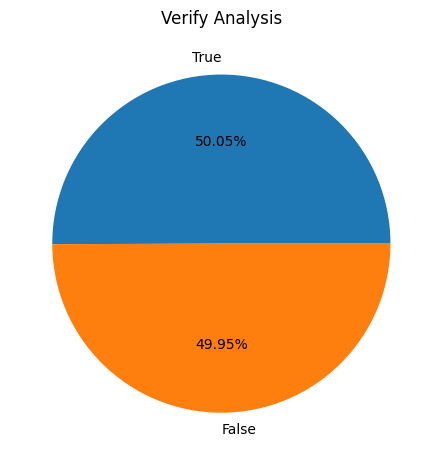

In [19]:
# Verify trp count
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Verify Analysis")
plt.pie(df2['verified'].value_counts().values, labels = df2['verified'].value_counts().index, autopct='%1.2f%%', shadow=False)
pass

df2['verified'].value_counts()

Positive    1071
Negative     701
Neutral      228
Name: Analysis, dtype: int64

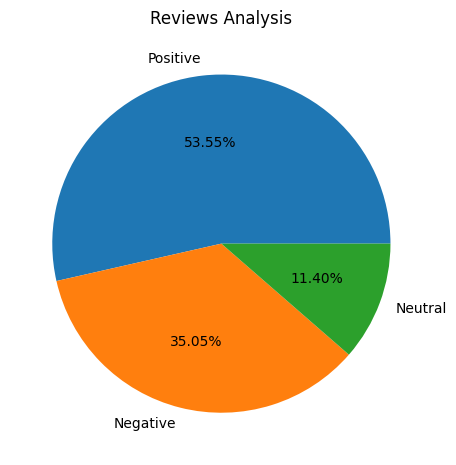

In [20]:
# Setiment count

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Reviews Analysis")
plt.pie(df2['Analysis'].value_counts().values, labels = df2['Analysis'].value_counts().index, autopct='%1.2f%%', shadow=False)
pass

df2['Analysis'].value_counts()

1     558
2     263
3     232
8     167
10    151
7     140
9     138
4     137
5     121
6      93
Name: ratings, dtype: int64

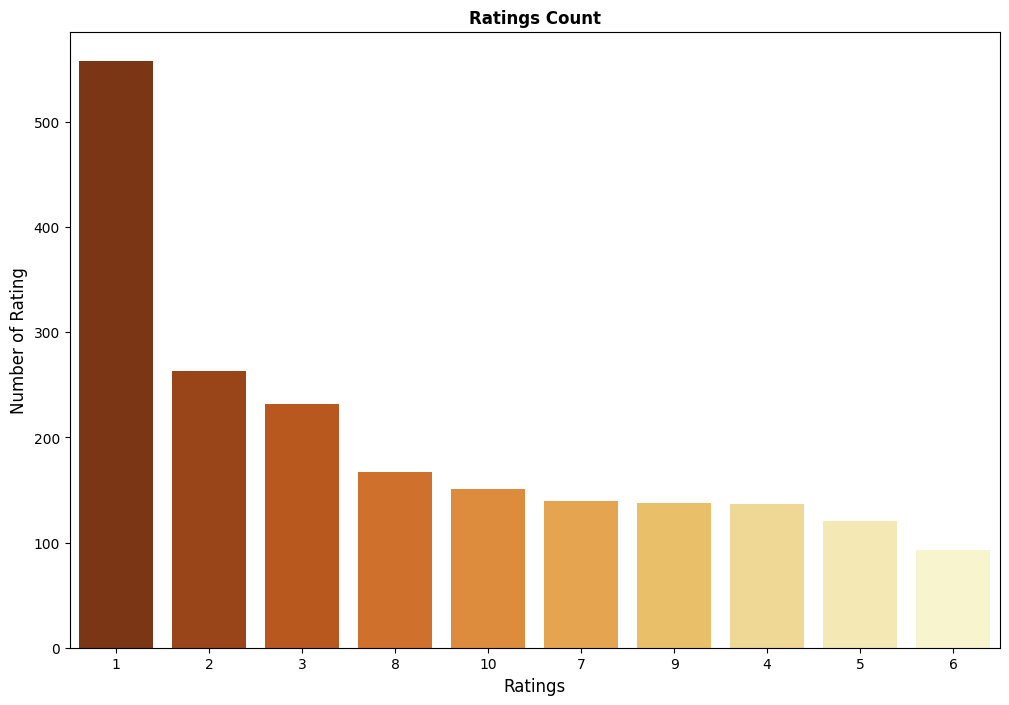

In [21]:
#rating count
plt.figure(figsize=(12,8))

sns.countplot(x ='ratings', data = df2, order = pd.value_counts(df2['ratings']).index, palette = 'YlOrBr_r')
plt.title('Ratings Count', weight='bold')
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of Rating', fontsize=12)
pass

df2['ratings'].value_counts()

In [149]:
df_country_review = pd.DataFrame(df2.country.value_counts().head(10)).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
df_country_review

,country,total_reviews
0,United Kingdom,1235
1,United States,235
2,Australia,64
3,Canada,63
4,Germany,44
5,South Africa,25
6,Switzerland,23
7,Netherlands,19
8,Singapore,18
9,Ireland,18


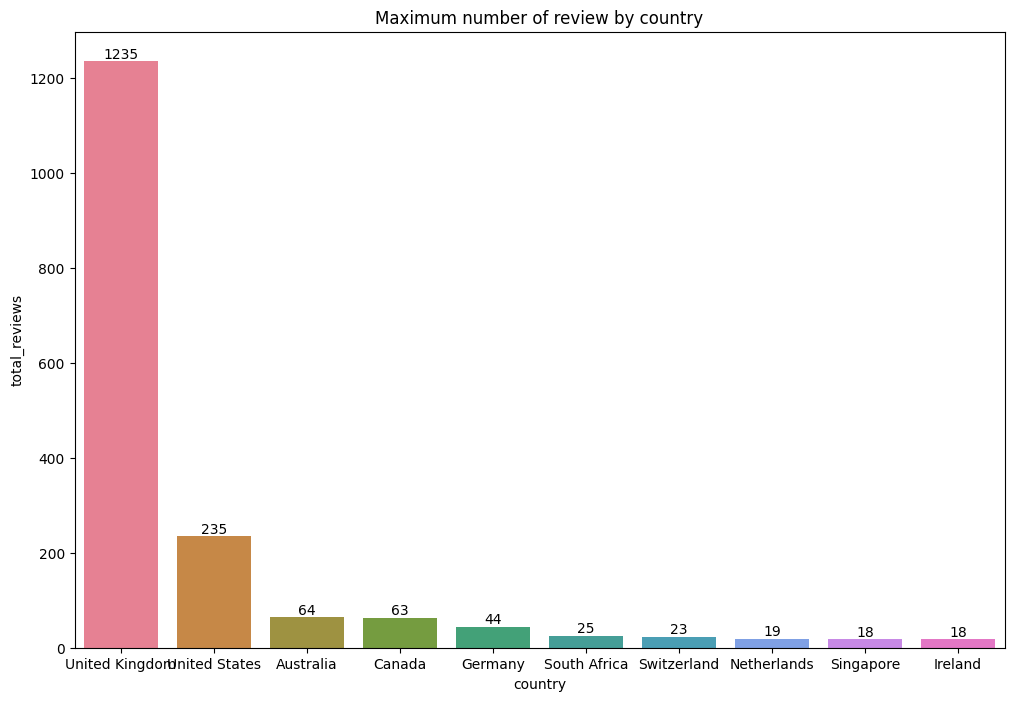

In [150]:
plt.figure(figsize =(12,8))
plt.title("Maximum number of review by country")
a = sns.barplot(x=df_country_review.country, y =df_country_review.total_reviews , data = df_country_review, palette='husl')
a.bar_label(a.containers[0])

pass

### Wordcloud
---
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [22]:
from wordcloud import WordCloud, STOPWORDS

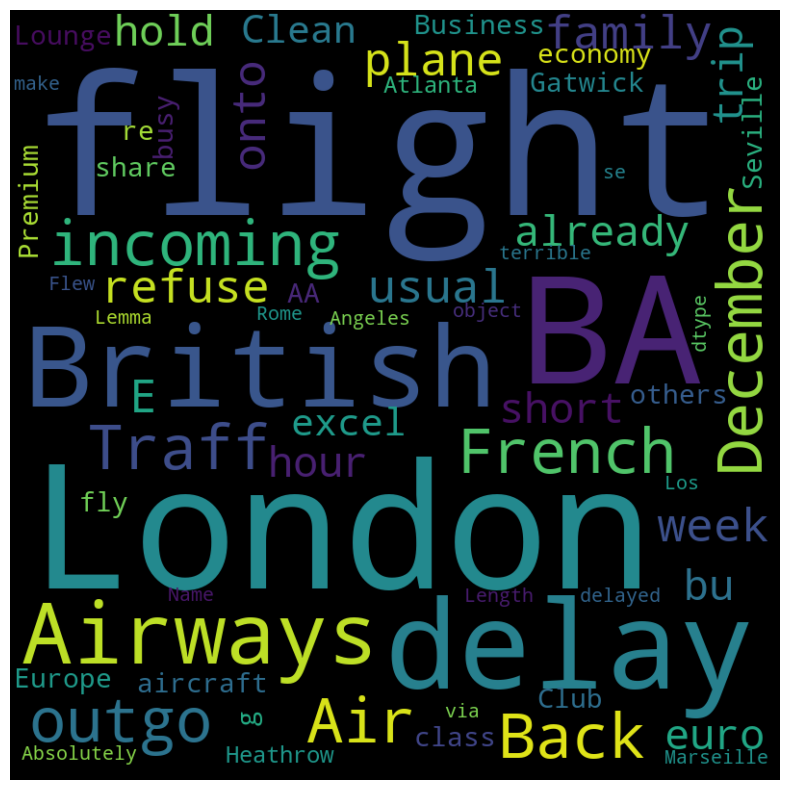

In [75]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        height = 200,
        width = 200,
        stopwords=stopwords,
        max_words= 1000,
        max_font_size= 50,
        scale=4,
        random_state=1)

    wordcloud= wordcloud.generate(str(data))

    fig = plt.figure(figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df2['Lemma'])

In [143]:
# Word frequency that not used for segmentation
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

lemma_dtb = " ".join(df2['clean_review'])
lemma_dtb = str(lemma_dtb)
lemma_dbt1 = lemma_dtb.split(" ")

stopwords = text.ENGLISH_STOP_WORDS.union(['We','BA','London','French','excel','December','AA','incoming','already','Angeles','Airways','Air','Traff','short', 'onto',
                                           're','British','flight','Back','Rome','Atlanta','French','dtype','Absolutely','I', ' ', 'The','-', '','economy','did','fly','flight.'
                                           ,'like','This','airline','passengers','check','Heathrow','They','plane','It','it','bussiness','customer','got'])

new_words = [word for word in lemma_dbt1 if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'service'),
  Text(1, 0, 'crew'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'food'),
  Text(4, 0, 'cabin'),
  Text(5, 0, 'time'),
  Text(6, 0, 'seats'),
  Text(7, 0, 'good'),
  Text(8, 0, 'staff'),
  Text(9, 0, 'business'),
  Text(10, 0, 'class'),
  Text(11, 0, 'just'),
  Text(12, 0, 'hours'),
  Text(13, 0, 'told'),
  Text(14, 0, 'flights'),
  Text(15, 0, 'hour'),
  Text(16, 0, 'meal'),
  Text(17, 0, 'lounge'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'long')])

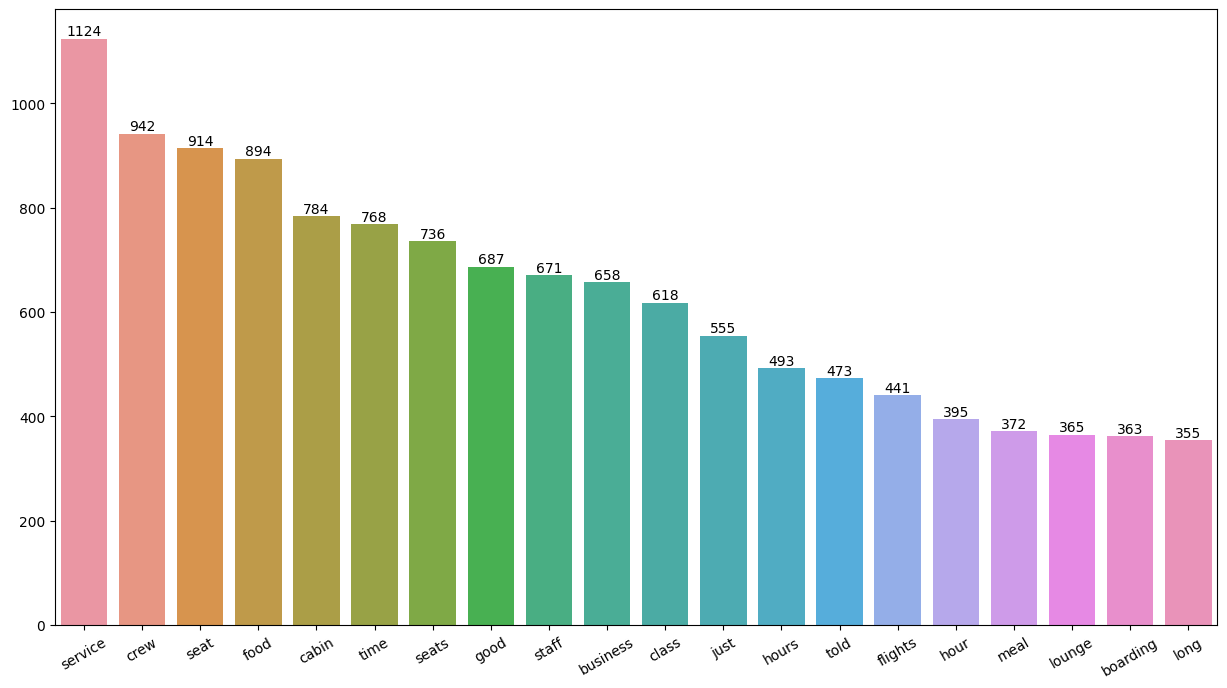

In [145]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

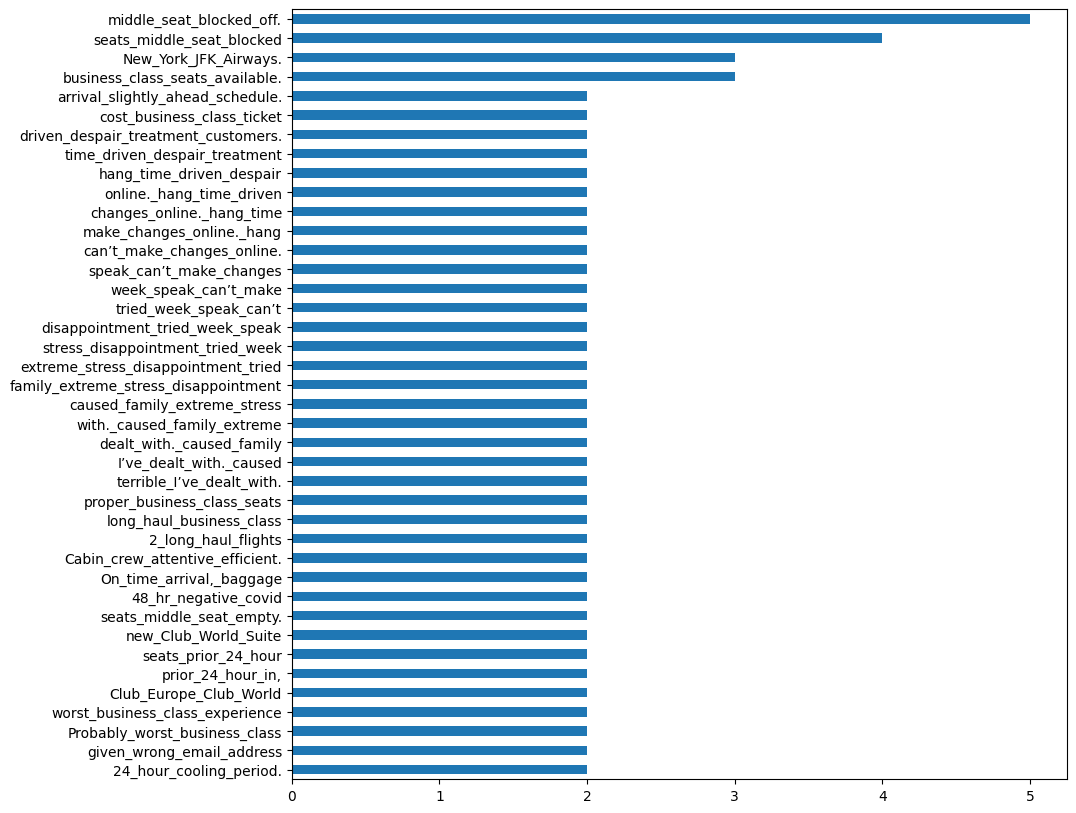

In [146]:
#Most common words

import nltk.collocations as collocations
from nltk import FreqDist, bigrams

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

## MODELING using Smote + Classification
---

In [152]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pd.options.display.float_format = "{:.3f}".format


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached xgboost-1.7.4-py3-none-win_amd64.whl (89.1 MB)


In [153]:
df.to_csv("E:/learn st new/BA_reviews2.csv")

In [154]:
df = pd.read_csv(r'E:\learn st new\british airways theforage\customer_booking.csv', encoding ='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.520,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.520,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.520,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.520,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.520,0


In [155]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [156]:
labelencoder = LabelEncoder()
df['sales_channel'] = labelencoder.fit_transform(df['sales_channel'])
df['trip_type'] =labelencoder.fit_transform(df['trip_type'])
df['flight_day'] =labelencoder.fit_transform(df['flight_day'])
df['route'] = labelencoder.fit_transform(df['route'])
df['booking_origin'] =labelencoder.fit_transform(df['booking_origin'])
df['wants_extra_baggage'] = labelencoder.fit_transform(df['wants_extra_baggage'])
df['wants_preferred_seat'] = labelencoder.fit_transform(df['wants_preferred_seat'])
df['wants_in_flight_meals'] = labelencoder.fit_transform(df['wants_in_flight_meals'])

#8 dữ liệu encoding

In [157]:
# pipeline featuring

num_features = ['sales_channel','trip_type','flight_day','route','booking_origin', 'wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']

cat_features = ['num_passengers','purchase_lead','length_of_stay', 'flight_hour', 'flight_duration']

features = num_features + cat_features
X = df.drop(["booking_complete"], axis=1)[features]
y = df["booking_complete"]

In [160]:
from imblearn.over_sampling import SMOTE

# Upsampling with SMOTE algorithm
smote = SMOTE(random_state= None ,k_neighbors= 5)

X_smote, y_smote = smote.fit_resample(X, y)


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value =0)),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [162]:
#Modelling

base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]


kfolds = 4 
split = KFold(n_splits= kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X_smote, y_smote, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1,
                                 error_score='raise')

    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DT_model cross validation accuarcy score: 0.821 +/- 0.0014 (std) min: 0.8187, max: 0.8223, 
RF_model cross validation accuarcy score: 0.8265 +/- 0.0022 (std) min: 0.8243, max: 0.8299, 
LR_model cross validation accuarcy score: 0.7178 +/- 0.0084 (std) min: 0.7042, max: 0.7258, 
XGB_model cross validation accuarcy score: 0.8303 +/- 0.0029 (std) min: 0.8265, max: 0.8339, 


In [163]:
#Accuaracy score with best performance model

xgb_model_enh = XGBClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X_smote, y_smote, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
print("Enhanced XGB model cross validation accuarcy score: {}%".format(100*round(np.mean(cv_results), 4)))

Enhanced XGB model cross validation accuarcy score: 83.39%
